In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
#read data
df = pd.read_csv('NYPD_Complaint_Data_Current_Year_To_Date_2024.csv')

In [5]:
#lets rename the columns to make it easier to understand
df.rename(columns={'ADDR_PCT_CD':'Precinct','BORO_NM':'Borough','CMPLNT_FR_DT':'Date of Occurrence',
                   'CRM_ATPT_CPTD_CD':'Crime Outcome','JURIS_DESC':'Jurisdiction Description',
                   'KY_CD':'Classification Code','LAW_CAT_CD':'Offense Level','LOC_OF_OCCUR_DESC':'Specific Location of Occurrence',
                   'OFNS_DESC':'Offense Description','PATROL_BORO':'Patrol Borough','PREM_TYP_DESC':'Premise Description','RPT_DT':'Date Event was Reported to Police',
                   'SUSP_AGE_GROUP':"Suspect's Age Group","SUSP_RACE":"Suspect's Race",'SUSP_SEX':"Suspect's Sex",	
                   'TRANSIT_DISTRICT':'Transit District','VIC_AGE_GROUP':"Victim's Age Group",'VIC_RACE':"Victim's Race",'VIC_SEX':"Victim's Sex"}, inplace=True)
#see df
df

,Precinct,Borough,Date of Occurrence,Crime Outcome,Jurisdiction Description,Classification Code,Offense Level,Specific Location of Occurrence,Offense Description,Patrol Borough,Premise Description,Date Event was Reported to Police,Suspect's Age Group,Suspect's Race,Suspect's Sex,Transit District,Victim's Age Group,Victim's Race,Victim's Sex
0,42,BRONX,01/03/2021,COMPLETED,N.Y. POLICE DEPT,364,MISDEMEANOR,INSIDE,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,PATROL BORO BRONX,RESIDENCE - APT. HOUSE,01/05/2024,UNKNOWN,UNKNOWN,U,NaN,UNKNOWN,UNKNOWN,E
1,47,BRONX,01/03/2021,COMPLETED,N.Y. POLICE DEPT,107,FELONY,INSIDE,BURGLARY,PATROL BORO BRONX,RESIDENCE - APT. HOUSE,01/04/2024,UNKNOWN,UNKNOWN,U,NaN,65+,BLACK,M
2,115,QUEENS,01/03/2021,COMPLETED,N.Y. POLICE DEPT,344,MISDEMEANOR,INSIDE,ASSAULT 3 & RELATED OFFENSES,PATROL BORO QUEENS NORTH,RESIDENCE - APT. HOUSE,04/23/2024,18-24,WHITE,M,NaN,25-44,WHITE,M
3,52,BRONX,01/03/2021,COMPLETED,N.Y. POLICE DEPT,578,VIOLATION,INSIDE,HARRASSMENT 2,PATROL BORO BRONX,RESIDENCE - APT. HOUSE,01/03/2024,25-44,AMERICAN INDIAN/ALASKAN NATIVE,M,NaN,45-64,ASIAN / PACIFIC ISLANDER,M
4,43,BRONX,01/05/2021,COMPLETED,N.Y. POLICE DEPT,107,FELONY,INSIDE,BURGLARY,PATROL BORO BRONX,RESIDENCE - APT. HOUSE,01/10/2024,UNKNOWN,UNKNOWN,M,NaN,45-64,ASIAN / PACIFIC ISLANDER,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281318,111,QUEENS,06/30/2024,COMPLETED,N.Y. POLICE DEPT,578,VIOLATION,FRONT OF,HARRASSMENT 2,PATROL BORO QUEENS NORTH,STREET,06/30/2024,45-64,WHITE,M,NaN,25-44,WHITE,F
281319,113,QUEENS,06/30/2024,COMPLETED,PORT AUTHORITY,344,MISDEMEANOR,(null),ASSAULT 3 & RELATED OFFENSES,PATROL BORO QUEENS SOUTH,AIRPORT TERMINAL,06/30/2024,25-44,WHITE HISPANIC,F,NaN,25-44,WHITE HISPANIC,M
281320,105,QUEENS,06/30/2024,COMPLETED,N.Y. POLICE DEPT,118,FELONY,INSIDE,DANGEROUS WEAPONS,PATROL BORO QUEENS SOUTH,RESIDENCE-HOUSE,06/30/2024,25-44,BLACK,M,NaN,UNKNOWN,UNKNOWN,E
281321,101,QUEENS,06/30/2024,COMPLETED,N.Y. POLICE DEPT,126,FELONY,FRONT OF,MISCELLANEOUS PENAL LAW,PATROL BORO QUEENS SOUTH,STREET,06/30/2024,UNKNOWN,UNKNOWN,U,NaN,65+,BLACK,M


**Total Number of Rows: 281323**

**Total Number of Columns: 19**

#### NOTE:

I reviewed the data beforehand and noticed two columns that had a high probability of having data entry errors. Since the "NYPD Complaints Incident Level Data Footnotes" does not have any information regarding those possible data entries, I have made the decision to remove them. 

### Supect's Age Group Values

In [10]:
#get the value counts 
vc = df["Suspect's Age Group"].value_counts(dropna=False)

unq = list(df["Suspect's Age Group"].unique())

print(f"The value counts of {vc}:")
print('-------------------------------------')
print("Here are ONLY the values of Suspect's Age Group: ", unq)
print('-------------------------------------')
print("The NaN values of", df["Suspect's Age Group"].isna().value_counts())

The value counts of Suspect's Age Group
UNKNOWN    104737
25-44       84788
(null)      31705
45-64       28738
18-24       21730
<18          6460
65+          3150
2024            3
1024            2
942             1
958             1
943             1
-30             1
-959            1
-951            1
953             1
-972            1
934             1
-924            1
Name: count, dtype: int64:
-------------------------------------
Here are ONLY the values of Suspect's Age Group:  ['UNKNOWN', '18-24', '25-44', '(null)', '45-64', '65+', '<18', '1024', '942', '2024', '958', '943', '-30', '-959', '-951', '953', '-972', '934', '-924']
-------------------------------------
The NaN values of Suspect's Age Group
False    281323
Name: count, dtype: int64


In [12]:
#TO DELETE INVALID ENTRIES

#put invalid entries in a list
del_age_groups = ['1024','942','2024','958','943','-30','-959','-951','953','-972','934','-924']

#lets drop the values
df.drop(df[df["Suspect's Age Group"].isin(del_age_groups)].index,inplace=True)
        
#reset the index and get rid of the old index
df.reset_index(drop=True,inplace=True)

### Victim's Age Group Values

In [15]:
#get the value counts
vc = df["Victim's Age Group"].value_counts(dropna=False)

unq = list(df["Victim's Age Group"].unique())

print(f"The value counts of {vc}:")
print('-------------------------------------')
print("Here are ONLY the values of Victim's Age Group: ", unq)
print('-------------------------------------')
print("The NaN values of", df["Victim's Age Group"].isna().value_counts())

The value counts of Victim's Age Group
25-44      95055
UNKNOWN    90544
45-64      48473
18-24      22009
65+        13607
<18        11599
-1             3
-951           2
-28            1
-973           1
940            1
-972           1
957            1
944            1
-965           1
953            1
-958           1
934            1
1023           1
928            1
966            1
963            1
-924           1
960            1
Name: count, dtype: int64:
-------------------------------------
Here are ONLY the values of Victim's Age Group:  ['UNKNOWN', '65+', '25-44', '45-64', '<18', '18-24', '-1', '-924', '963', '966', '928', '1023', '953', '934', '-951', '-958', '-28', '-965', '944', '957', '-972', '940', '-973', '960']
-------------------------------------
The NaN values of Victim's Age Group
False    281308
Name: count, dtype: int64


In [17]:
#TO DELETE INVALID ENTRIES

#put invalid entries in a list
del_age_groups = ['-1','-924','963','966','928','1023','953','934','-951','-958','-28','-965','944','957','-972','940','-973','960']

#lets drop the values
df.drop(df[df["Victim's Age Group"].isin(del_age_groups)].index,inplace=True)
        
#reset the index and get rid of the old index
df.reset_index(drop=True,inplace=True)

#### NOTE

In our dataset, empty values are replaced with "(null)". This poses a problem as it misrepresents the true count of actual values in our dataset. The "NYPD Complaints Incident Level Data Foonotes" states the following:

- **Data is available as of the date that technological enhancements to information systems allowed for data capture. Null values appearing frequently in certain fields may be atttributed to changes on official department forms where data was previously not collected. Null values may also appear in instances where information was not available or unknown at the time of the report and should be considered as either "Unknown/Not Available/Not Reported.**

Given this information, we will replace all "(null)", UNKNOWN, and 'U' values with NaN. This will make handling the data easier.

**1. (null) values**

In [22]:
#COUNT (NULL) VALUES 

#Count the occurrences of '(null)' in each element across the entire DataFrame
null_count = (df == '(null)').sum().sum()

#see the count by column
null_count_by_column = (df == '(null)').sum()

#Print the results
print(f"Total '(null)' values in the DataFrame: {null_count}")
print("\nCount of '(null)' values by column:")
print(null_count_by_column)

Total '(null)' values in the DataFrame: 168623

Count of '(null)' values by column:
Precinct                                 0
Borough                                150
Date of Occurrence                       0
Crime Outcome                            0
Jurisdiction Description                 0
Classification Code                      0
Offense Level                            0
Specific Location of Occurrence      60832
Offense Description                      5
Patrol Borough                           0
Premise Description                  12528
Date Event was Reported to Police        0
Suspect's Age Group                  31698
Suspect's Race                       31698
Suspect's Sex                        31698
Transit District                         0
Victim's Age Group                       0
Victim's Race                           14
Victim's Sex                             0
dtype: int64


**2. unknown values**

In [24]:
#COUNT UNKNOWN VALUES 

#Count the occurrences of 'UNKNOWN' in each element across the entire DataFrame
unknown_count = (df == 'UNKNOWN').sum().sum()

#see the count by column
unknown_count_by_column = (df == 'UNKNOWN').sum()

#Print the results
print(f"Total 'UNKNOWN' values in the DataFrame: {unknown_count}")
print("\nCount of 'UNKNOWN' values by column:")
print(unknown_count_by_column)

Total 'UNKNOWN' values in the DataFrame: 361894

Count of 'UNKNOWN' values by column:
Precinct                                  0
Borough                                   0
Date of Occurrence                        0
Crime Outcome                             0
Jurisdiction Description                  0
Classification Code                       0
Offense Level                             0
Specific Location of Occurrence           0
Offense Description                       0
Patrol Borough                            0
Premise Description                       0
Date Event was Reported to Police         0
Suspect's Age Group                  104728
Suspect's Race                        70378
Suspect's Sex                             0
Transit District                          0
Victim's Age Group                    90544
Victim's Race                         96244
Victim's Sex                              0
dtype: int64


**3. u values**

In [27]:
#COUNT U VALUES 

#Count the occurrences of 'U' in each element across the entire DataFrame
u_count = (df == 'U').sum().sum()

#see the count by column
u_count_by_column = (df == 'U').sum()

#Print the results
print(f"Total 'U' values in the DataFrame: {u_count}")
print("\nCount of 'U' values by column:")
print(u_count_by_column)

Total 'U' values in the DataFrame: 55638

Count of 'U' values by column:
Precinct                                 0
Borough                                  0
Date of Occurrence                       0
Crime Outcome                            0
Jurisdiction Description                 0
Classification Code                      0
Offense Level                            0
Specific Location of Occurrence          0
Offense Description                      0
Patrol Borough                           0
Premise Description                      0
Date Event was Reported to Police        0
Suspect's Age Group                      0
Suspect's Race                           0
Suspect's Sex                        55638
Transit District                         0
Victim's Age Group                       0
Victim's Race                            0
Victim's Sex                             0
dtype: int64


**replace**

In [29]:
#before replacing all values that should be NaN, let's just see how many NaN values we currently have in the dataset
print("Total 'NaN' values in the DataFrame", df.isna().sum().sum())
print()
print(df.isna().sum())

Total 'NaN' values in the DataFrame 268841

Precinct                                  0
Borough                                   0
Date of Occurrence                        0
Crime Outcome                             0
Jurisdiction Description                  0
Classification Code                       0
Offense Level                             0
Specific Location of Occurrence           0
Offense Description                       0
Patrol Borough                            0
Premise Description                       0
Date Event was Reported to Police         0
Suspect's Age Group                       0
Suspect's Race                            0
Suspect's Sex                             0
Transit District                     268841
Victim's Age Group                        0
Victim's Race                             0
Victim's Sex                              0
dtype: int64


In [31]:
#REPLACE (null), UNKNOWN, and U values with NaN
df.replace(to_replace=['(null)','UNKNOWN','U'],value=np.nan,inplace=True)

#check 
print("Total 'NaN' values in the DataFrame", df.isna().sum().sum())
print()
print(df.isna().sum())

Total 'NaN' values in the DataFrame 854996

Precinct                                  0
Borough                                 150
Date of Occurrence                        0
Crime Outcome                             0
Jurisdiction Description                  0
Classification Code                       0
Offense Level                             0
Specific Location of Occurrence       60832
Offense Description                       5
Patrol Borough                            0
Premise Description                   12528
Date Event was Reported to Police         0
Suspect's Age Group                  136426
Suspect's Race                       102076
Suspect's Sex                         87336
Transit District                     268841
Victim's Age Group                    90544
Victim's Race                         96258
Victim's Sex                              0
dtype: int64


### Next Step

When looking at our data, we see that the data types can be configured more effectively, so lets do that. I went through all the values in all columns and have determined to convert the following columns into a datetime, numeric, and category type.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281287 entries, 0 to 281286
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Precinct                           281287 non-null  int64  
 1   Borough                            281137 non-null  object 
 2   Date of Occurrence                 281287 non-null  object 
 3   Crime Outcome                      281287 non-null  object 
 4   Jurisdiction Description           281287 non-null  object 
 5   Classification Code                281287 non-null  int64  
 6   Offense Level                      281287 non-null  object 
 7   Specific Location of Occurrence    220455 non-null  object 
 8   Offense Description                281282 non-null  object 
 9   Patrol Borough                     281287 non-null  object 
 10  Premise Description                268759 non-null  object 
 11  Date Event was Reported to Police  2812

**datetime**

In [37]:
#lets convert date_time columns to its proper data type
df["Date of Occurrence"] = pd.to_datetime(df['Date of Occurrence'], errors='coerce')
df["Date Event was Reported to Police"] = pd.to_datetime(df["Date Event was Reported to Police"], errors='coerce')

**category**

In [39]:
#set precinct to numeric with error='corerce', to ensure that anything that is not a number will be substituted with NaN
df['Precinct'] = pd.to_numeric(df['Precinct'], errors='coerce')

#set borough to category
df['Borough'] = df['Borough'].astype('category')

#set Crime Outcome to category
df['Crime Outcome'] = df['Crime Outcome'].astype('category')

#set classification code to numeric with error='corerce', to ensure that anything that is not a number will be substituted with NaN
df['Classification Code'] = pd.to_numeric(df['Classification Code'], errors='coerce')

#set Offense Level to category
df['Offense Level'] = df['Offense Level'].astype('category')

#set Specific Location of Occurrence to category
df['Specific Location of Occurrence'] = df['Specific Location of Occurrence'].astype('category')

#set Patrol Borough to category
df['Patrol Borough'] = df['Patrol Borough'].astype('category')

#set Suspect's Age Group to category
df["Suspect's Age Group"] = df["Suspect's Age Group"].astype('category')

#set Suspect's Race Description to category
df["Suspect's Race"] = df["Suspect's Race"].astype('category')

#set Suspect's Sex to category 
df["Suspect's Sex"] = df["Suspect's Sex"].astype('category')

#set Transit District to Int from float. We are using Int64 instead of int64 because this column has NaN values. Int64 allows us
#to keep the column as an integer while maintaining the ability to handle NaN values
df["Transit District"] = df["Transit District"].astype('Int64')

#set Victim's Age Group to category 
df["Victim's Age Group"] = df["Victim's Age Group"].astype('category')

#set Victim's Race to category 
df["Victim's Race"] = df["Victim's Race"].astype('category')

#set Victim's Age Group to category 
df["Victim's Sex"] = df["Victim's Sex"].astype('category')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281287 entries, 0 to 281286
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Precinct                           281287 non-null  int64         
 1   Borough                            281137 non-null  category      
 2   Date of Occurrence                 281287 non-null  datetime64[ns]
 3   Crime Outcome                      281287 non-null  category      
 4   Jurisdiction Description           281287 non-null  object        
 5   Classification Code                281287 non-null  int64         
 6   Offense Level                      281287 non-null  category      
 7   Specific Location of Occurrence    220455 non-null  category      
 8   Offense Description                281282 non-null  object        
 9   Patrol Borough                     281287 non-null  category      
 10  Premise Description 

### NOTE

We have halved the memory usage by more than half :)



# Visualizations

At this point, the data is ready to be analyzed. I will create visualizations to gain some greater insight on the NYPD Complaints Incident Level Data.

## Question 1

**What is the share of NYPD Incindent Complaints per year for every borough?**

In [49]:
#lets create the dataframes for the years
df_2021 = df[df['Date of Occurrence'].dt.year == 2021]
df_2022 = df[df['Date of Occurrence'].dt.year == 2022]
df_2023 = df[df['Date of Occurrence'].dt.year == 2023]
df_2024 = df[df['Date of Occurrence'].dt.year == 2024]

#get Borough data for the years
borough_counts_2021 = df_2021['Borough'].value_counts()
borough_counts_2022 = df_2022['Borough'].value_counts()
borough_counts_2023 = df_2023['Borough'].value_counts()
borough_counts_2024 = df_2024['Borough'].value_counts()

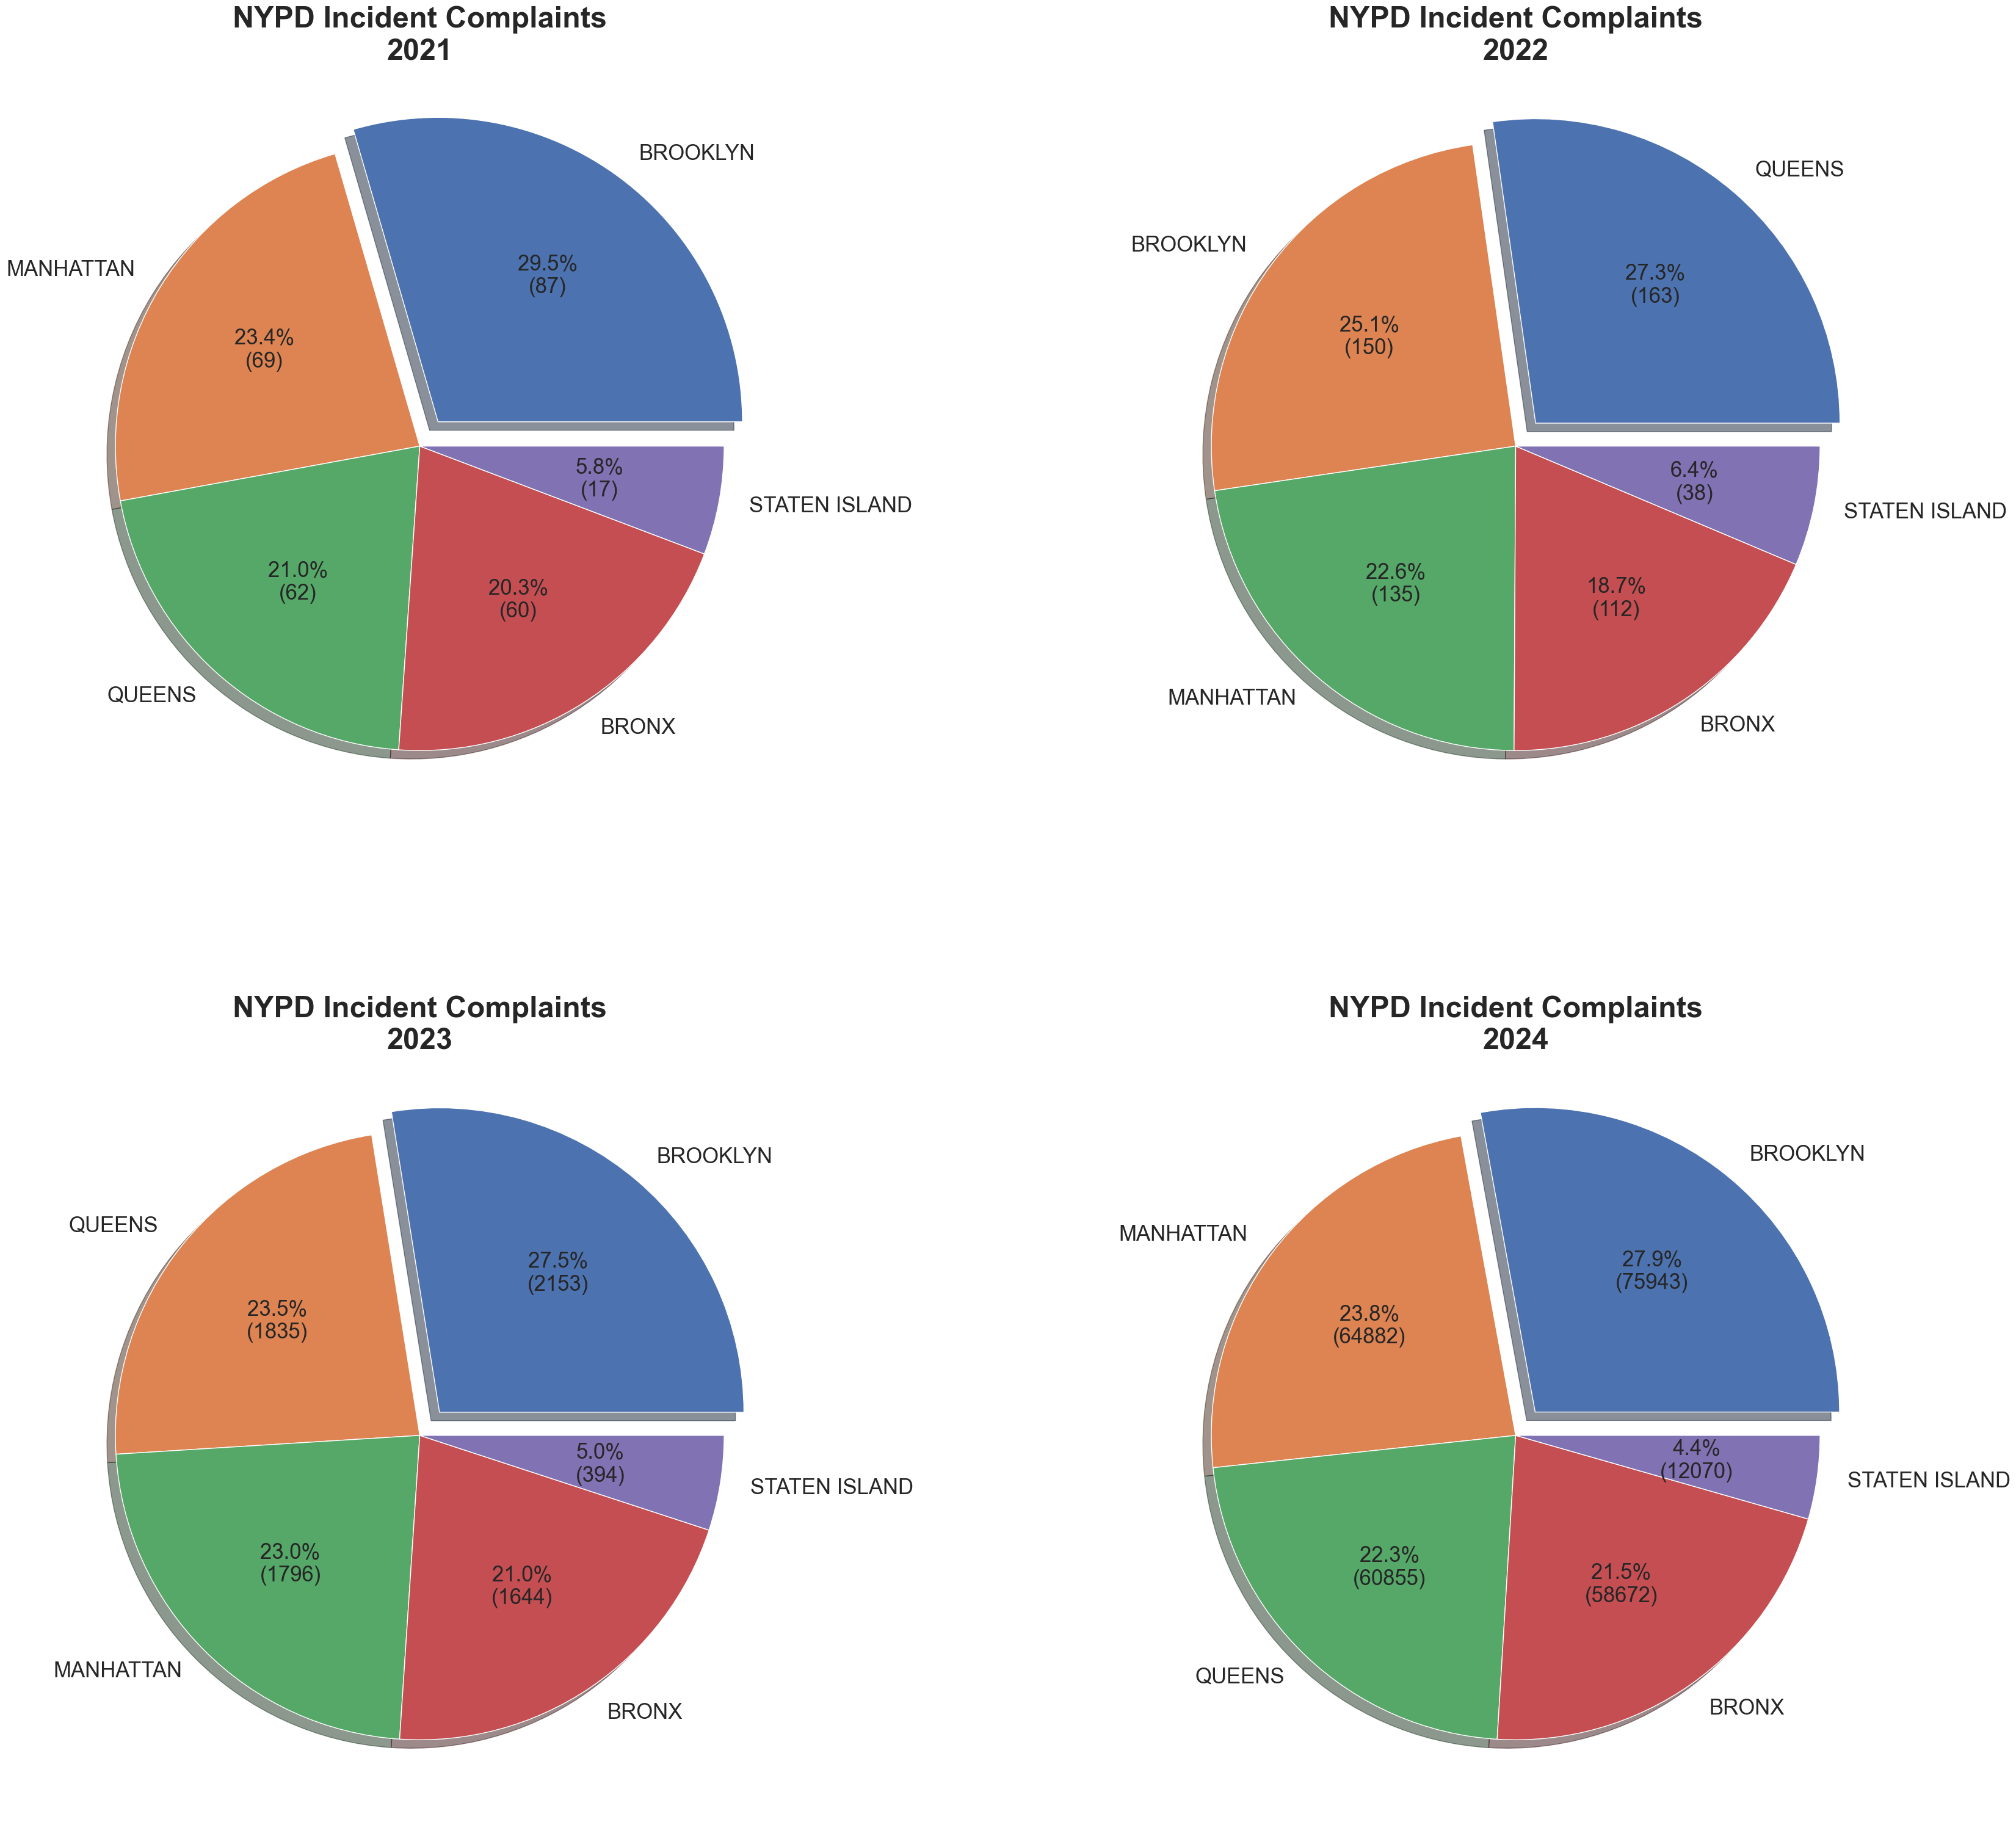

In [51]:
#figsize
plt.figure(figsize=(35,30))

#plot 2021 data
plt.subplot(2,2,1)
def fmt(x):
    return "{:.1f}%\n({:.0f})".format(x, borough_counts_2021.sum()*x/100)
plt.pie(borough_counts_2021, labels=borough_counts_2021.index, autopct=fmt,shadow=True,textprops={'fontsize':25},explode=(0.1,0,0,0,0))
plt.title('NYPD Incident Complaints\n2021', fontsize=35, fontweight='bold',pad=0.5)

#plot 2022 data
plt.subplot(2,2,2)
def fmt(x):
    return "{:.1f}%\n({:.0f})".format(x, borough_counts_2022.sum()*x/100)
plt.pie(borough_counts_2022, labels=borough_counts_2022.index, autopct=fmt,shadow=True,textprops={'fontsize':25},explode=(0.1,0,0,0,0))
plt.title('NYPD Incident Complaints\n2022', fontsize=35, fontweight='bold',pad=0.5)

#plot 2023 data
plt.subplot(2,2,3)
def fmt(x):
    return "{:.1f}%\n({:.0f})".format(x, borough_counts_2023.sum()*x/100)
plt.pie(borough_counts_2023, labels=borough_counts_2023.index, autopct=fmt,shadow=True,textprops={'fontsize':25},explode=(0.1,0,0,0,0))
plt.title('NYPD Incident Complaints\n2023', fontsize=35, fontweight='bold',pad=0.2)

#plot 2024 data
plt.subplot(2,2,4)
def fmt(x):
    return "{:.1f}%\n({:.0f})".format(x, borough_counts_2024.sum()*x/100)
plt.pie(borough_counts_2024, labels=borough_counts_2024.index, autopct=fmt,shadow=True,textprops={'fontsize':25},explode=(0.1,0,0,0,0))
plt.title('NYPD Incident Complaints\n2024', fontsize=35, fontweight='bold',pad=0.2)

#show
plt.tight_layout()
plt.subplots_adjust(wspace=0.15,hspace=0.3) 
plt.show()

#def fmt(x) gets the number of incident complaints for each borough

#the plot does NOT contain the NaN values, which are 150 in total

## Question 2

**How about the total share of NYPD Incident Complaints per borough from 2021 (Jan 03, 2021) to 2024 (June 30, 2024)?**

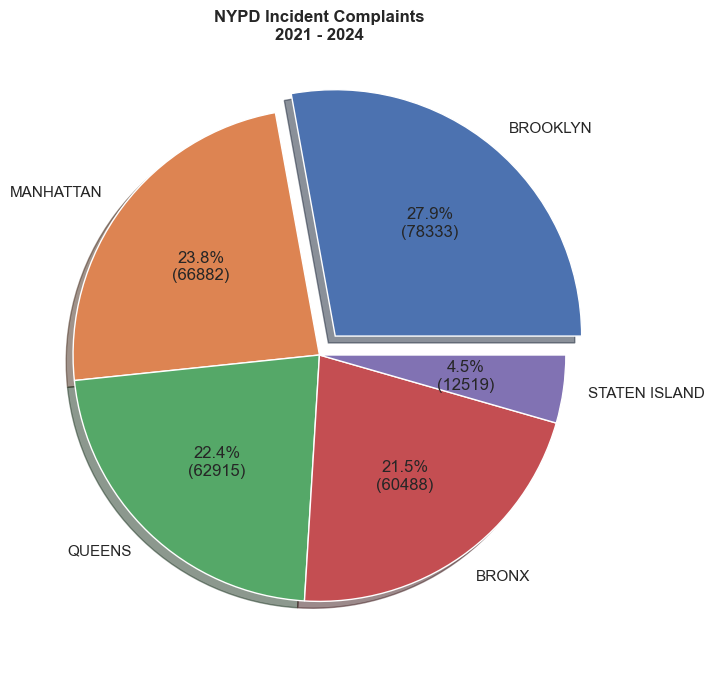

In [53]:
#create series for total borough counts
borough_total_counts = df['Borough'].value_counts()

#adjust figure size
plt.figure(figsize=(8,8))

#code will execute after plt.pie() creates the pie chart and, for each slice, it calculates the percentage (x) for that slice.
def fmt(x):
    return "{:.1f}%\n({:.0f})".format(x, borough_total_counts.sum()*x/100)
plt.title('NYPD Incident Complaints\n2021 - 2024',fontweight='bold')
plt.pie(borough_total_counts,labels=borough_total_counts.index,explode=(0.1,0,0,0,0),shadow=True,autopct=fmt)
plt.show()

## Question 3

**What's the overall Offense Level in NYC? What's the percentage of racial groups that are affected by the most common offense level?**

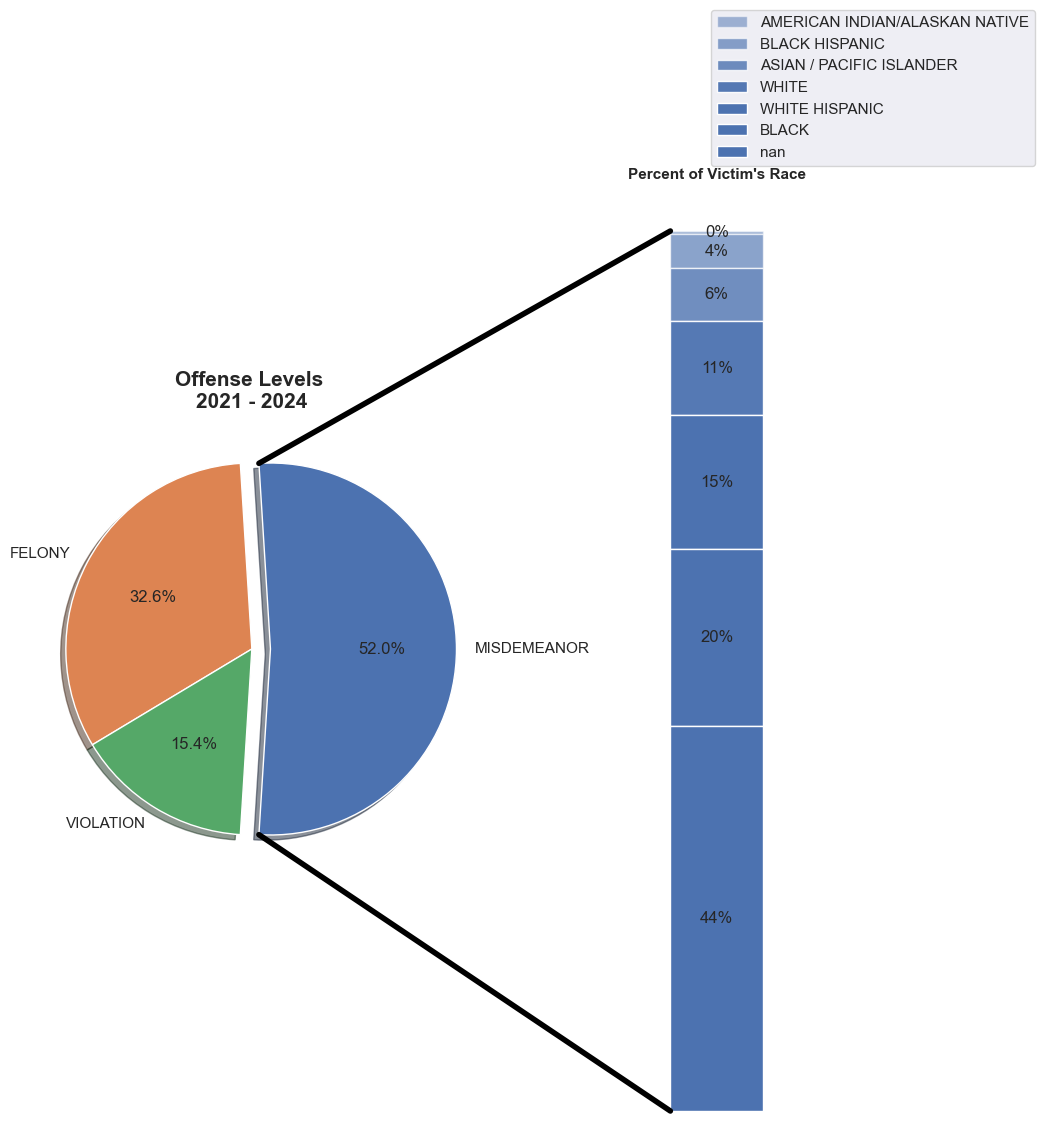

In [57]:
#import ConnectPatch to create the line connecting the pie chart with bar
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
fig.subplots_adjust(wspace=0)

#pie chart parameters
offense_level = df['Offense Level'].value_counts()
overall_ratios = list(offense_level.values/offense_level.sum())
labels = offense_level.index
explode = [0.1,0,0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode,shadow=True)

#bar chart parameters
misdemeanor_offense = df[df['Offense Level'] == "MISDEMEANOR"]
victim_ratio = list(misdemeanor_offense["Victim's Race"].value_counts(dropna=False)/misdemeanor_offense["Victim's Race"].value_counts(dropna=False).sum())
victim_labels = misdemeanor_offense["Victim's Race"].value_counts(dropna=False).index
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(victim_ratio, victim_labels)])):
    bottom -= height
    alpha = min(0.5+ 0.15 * j, 1)
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=alpha)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax1.set_title('Offense Levels \n2021 - 2024',fontweight='bold',fontsize=15)

ax2.set_title("Percent of Victim's Race",fontweight='bold',fontsize=11)
# Adjust the legend position
ax2.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))  # Adjust the location as needed
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(victim_ratio)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

Should be noted that the column 'Offense Level' has no NaN values, meaning all Incident Complaints are documented as either a Misdemeanor, Felony, or Violation. As for the Victim's Race column, there are NaN values. Therefore, some offense levels are tied to a victim's race value that is NaN. As a result, I added Victim's Race NaN values into the percentage of victims' races affected by misdemeanors as its exclusion would inflate the percentages, skewing the true results. 

Without the inclusion of NaN values, the Percentage of Victim's Race affected by all misdemeanors is:
1. Black - 36%
2. White Hispanic - 27%
3. White - 19%
4. Asian/Pacific Islander - 11%
5. Black Hispanic - 7%
6. American Indian/Alaskan Native - 1%

## Question 4

**What are the Top 5 and Bottom 5 Classification Codes for every offense level?**

In [61]:
#create the dataframe for the offense levels
misdemeanor_data = df[df['Offense Level'] == "MISDEMEANOR"]
felony_data = df[df['Offense Level'] == "FELONY"]
violation_data = df[df['Offense Level'] == "VIOLATION"]

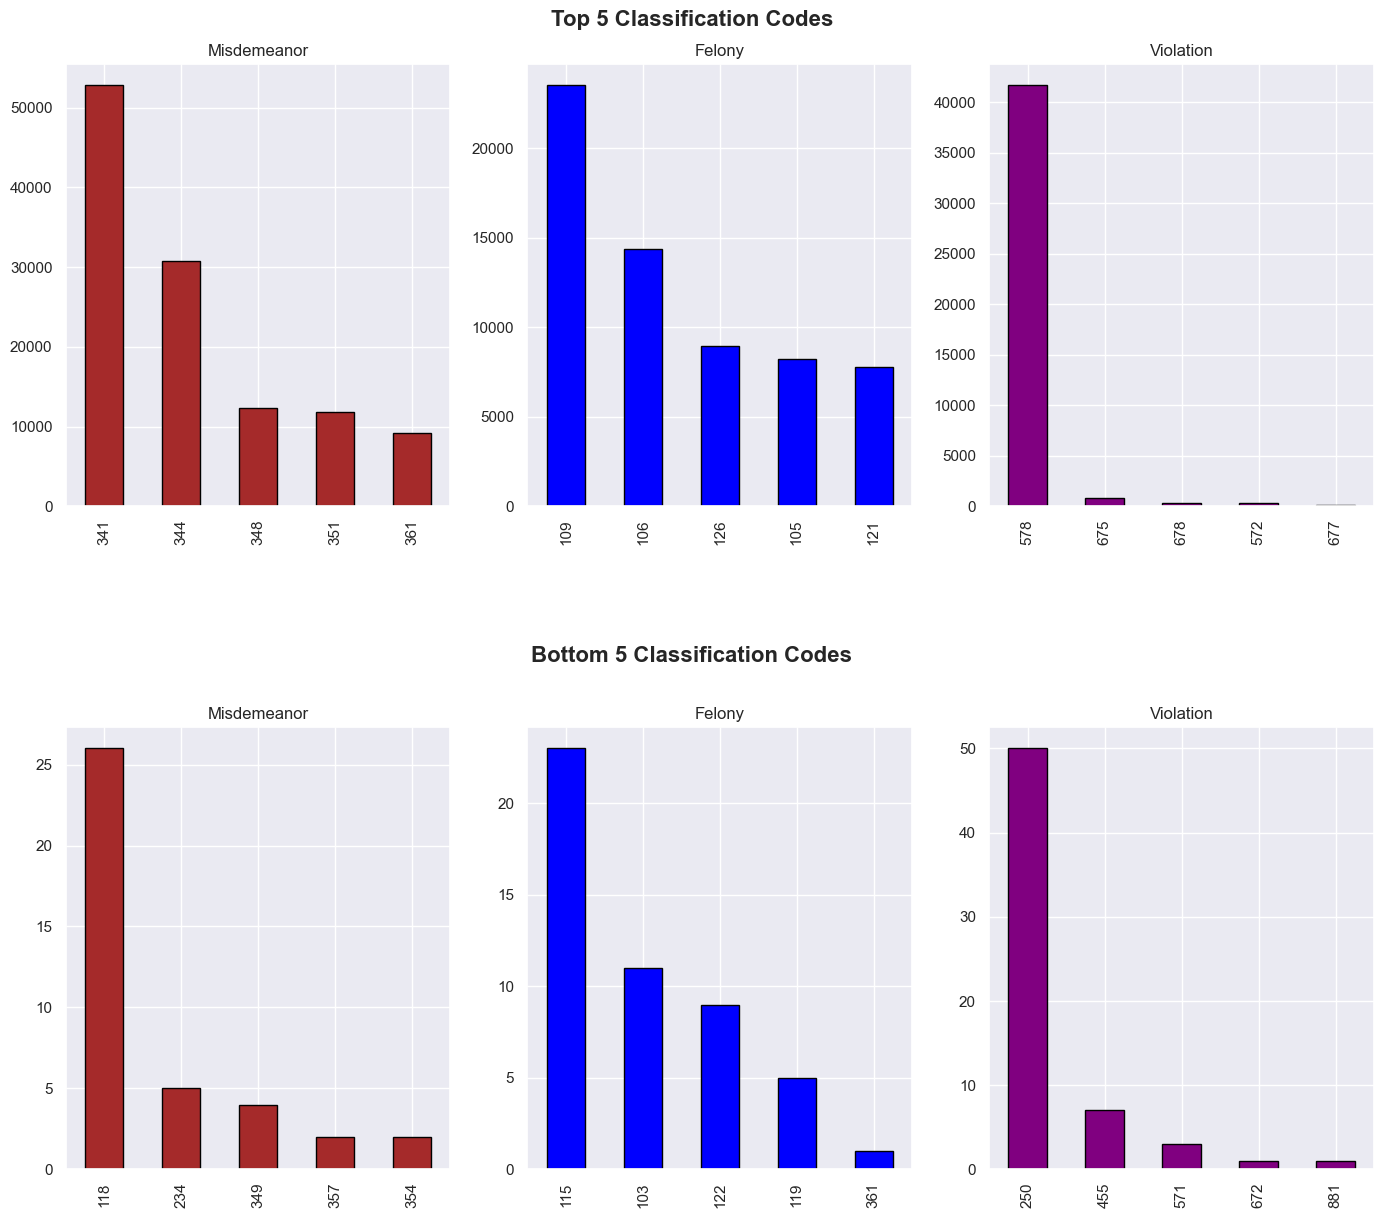

In [63]:
#adjust the figure size and create subplots
fig, axs = plt.subplots(2,3,figsize=(14,12))

# Top half title (spanning across the top row)
fig.text(0.5, 1, 'Top 5 Classification Codes', ha='center', fontsize=16, fontweight='bold')

# Bottom half title (spanning across the bottom row)
fig.text(0.5, 0.47, 'Bottom 5 Classification Codes', ha='center', fontsize=16, fontweight='bold')

#top 5
misdemeanor_data['Classification Code'].value_counts().head().plot(kind='bar',color='brown',ax=axs[0][0],xlabel='',edgecolor='black')
axs[0][0].set_title('Misdemeanor')

felony_data['Classification Code'].value_counts().head().plot(kind='bar',color='blue',ax=axs[0][1], xlabel='',edgecolor='black')
axs[0][1].set_title('Felony')

violation_data['Classification Code'].value_counts().head().plot(kind='bar',color='purple',ax=axs[0][2],xlabel='',edgecolor='black')
axs[0][2].set_title('Violation')


#bottom 5
misdemeanor_data['Classification Code'].value_counts().tail().plot(kind='bar',color='brown',ax=axs[1][0],xlabel='',edgecolor='black')
axs[1][0].set_title('Misdemeanor')

felony_data['Classification Code'].value_counts().tail().plot(kind='bar',color='blue',ax=axs[1][1], xlabel='',edgecolor='black')
axs[1][1].set_title('Felony')

violation_data['Classification Code'].value_counts().tail().plot(kind='bar',color='purple',ax=axs[1][2],xlabel='',edgecolor='black')
axs[1][2].set_title('Violation')


plt.tight_layout()
plt.subplots_adjust(wspace=0.2,hspace=0.5) 
plt.show()

**Question 5**

**How frequently was each sex affected by crime? Which sex is committing the most crime?**

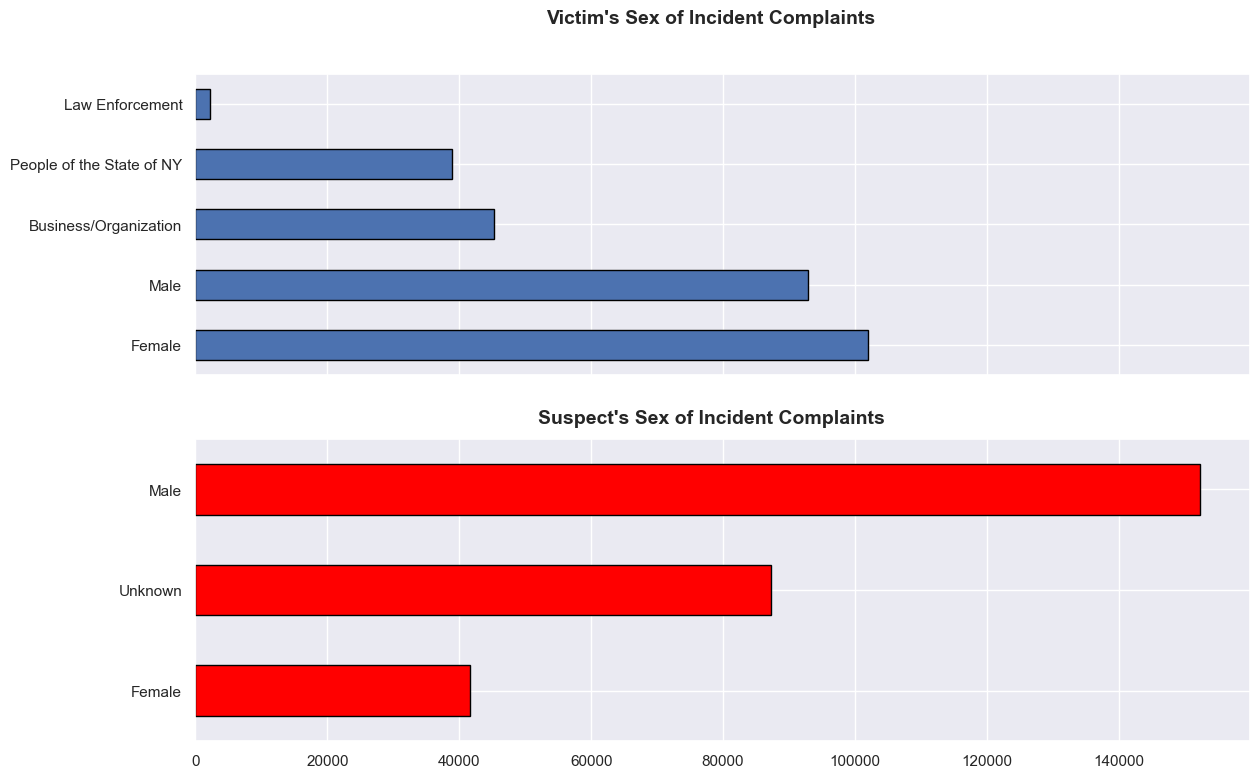

In [65]:
#NOTE: NYPD Footnotes describe 4 groups in Victim's Sex. When analyzing the Victim's Sex column, there are 5 groups
#with the 5th one being labeled as "L". It is my best judgement that "L" stands for Law Enforcement

#subplot
fig, axs = plt.subplots(2,1, figsize=(12,8),sharex=True)
fig.tight_layout(pad=3)

#top half title
fig.text(0.5,1,"Victim's Sex of Incident Complaints",ha='center', va='center',fontweight='bold',fontsize=14)

#plot 1
df["Victim's Sex"].value_counts(dropna=False).plot(kind='barh',ax=axs[0],edgecolor='black',ylabel='')
axs[0].set_yticklabels(['Female','Male','Business/Organization','People of the State of NY','Law Enforcement'])

#bottom half title
fig.text(0.5,0.5,"Suspect's Sex of Incident Complaints", ha='center',va='center',fontweight='bold',fontsize=14)

#plot 2
df["Suspect's Sex"].value_counts(dropna=False).sort_values(ascending=True).plot(kind='barh', ax=axs[1],color='red',edgecolor='black',ylabel='')
axs[1].set_yticklabels(['Female','Unknown','Male'])

plt.show()

## Question 6

**What is the breakdown of age groups for victims and suspects?**

In [69]:
new_df = pd.DataFrame([list(df_2021["Victim's Age Group"].value_counts(sort=False)),
                      list(df_2022["Victim's Age Group"].value_counts(sort=False)),
                      list(df_2023["Victim's Age Group"].value_counts(sort=False)),
                       list(df_2024["Victim's Age Group"].value_counts(sort=False))],columns=['18-24','25-44','45-64','65+','<18'])

#lets move '<18' to the first column
col = new_df.pop('<18')
new_df.insert(0,'<18',col)

#lets rename the index
new_df.rename(index={0:2021,1:2022,2:2023,3:2024},inplace=True)

new_df

,<18,18-24,25-44,45-64,65+
2021,30,22,95,70,28
2022,75,41,178,134,60
2023,403,500,2793,1669,751
2024,11091,21446,91989,46600,12768


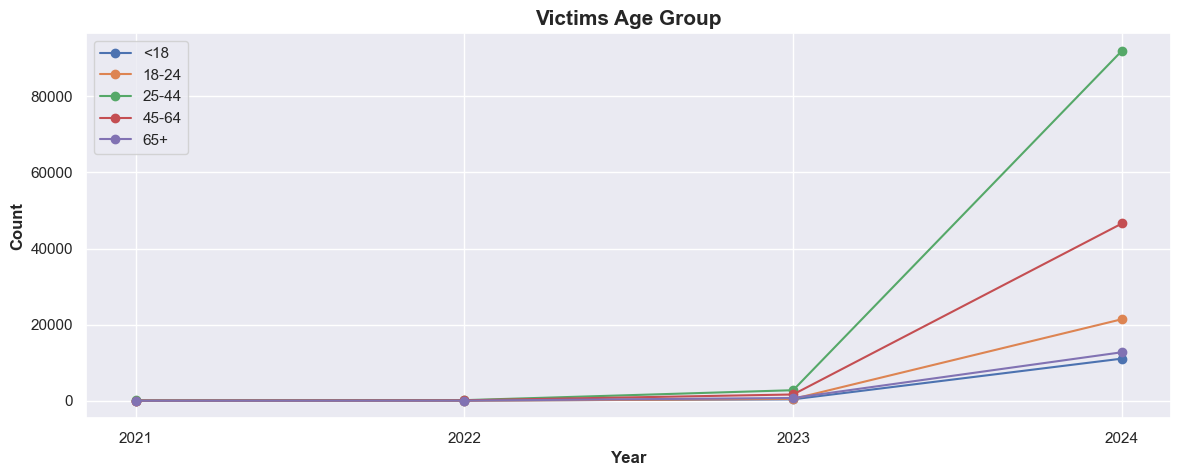

In [71]:
new_df.plot(kind='line',marker='o',figsize=(14,5))
plt.title('Victims Age Group',fontweight='bold',fontsize=15)
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.xticks(new_df.index)

#show
plt.show()

In [73]:
new_df2 = pd.DataFrame([list(df_2021["Suspect's Age Group"].value_counts(sort=False)),
                      list(df_2022["Suspect's Age Group"].value_counts(sort=False)),
                      list(df_2023["Suspect's Age Group"].value_counts(sort=False)),
                       list(df_2024["Suspect's Age Group"].value_counts(sort=False))],columns=['18-24','25-44','45-64','65+','<18'])

#lets move '<18' to the first column
col = new_df2.pop('<18')
new_df2.insert(0,'<18',col)

#lets rename the index
new_df2.rename(index={0:2021,1:2022,2:2023,3:2024},inplace=True)

new_df2

,<18,18-24,25-44,45-64,65+
2021,3,17,63,39,6
2022,16,29,129,72,8
2023,113,288,1539,665,62
2024,6328,21395,83055,27960,3074


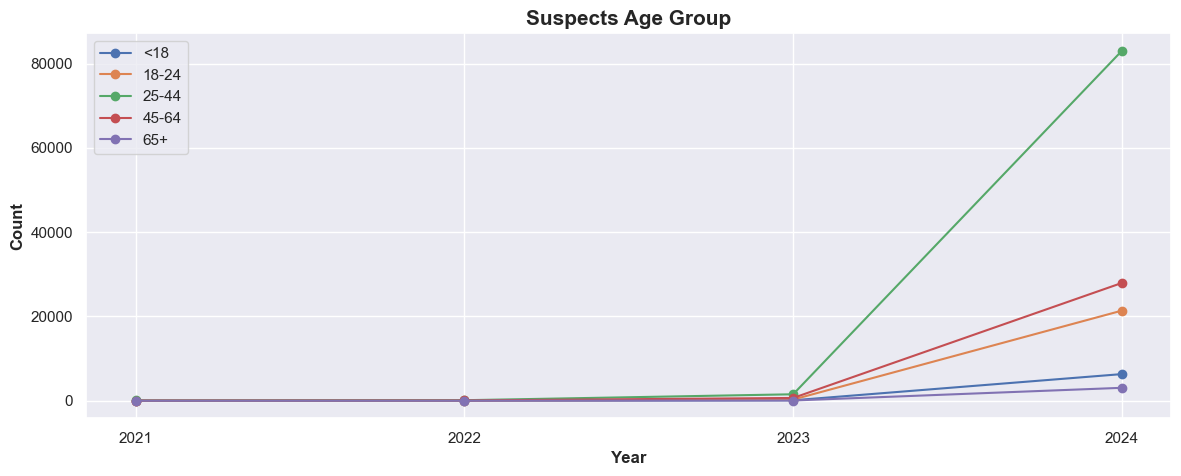

In [75]:
new_df2.plot(kind='line',marker='o',figsize=(14,5))
plt.title('Suspects Age Group',fontweight='bold',fontsize=15)
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.xticks(new_df2.index)

#show
plt.show()

The line chart for both the Victims Age Group and Suspects Age Group does not contain NaN values as we are simply counting incident complaints with confirmed ages of victims and suspects. 

If interested in the NaN values for Victims and Suspects, please look below.

In [78]:
print(df["Victim's Age Group"].value_counts(dropna=False))
print()
print(df["Suspect's Age Group"].value_counts(dropna=False))

Victim's Age Group
25-44    95055
NaN      90544
45-64    48473
18-24    22009
65+      13607
<18      11599
Name: count, dtype: int64

Suspect's Age Group
NaN      136426
25-44     84786
45-64     28736
18-24     21729
<18        6460
65+        3150
Name: count, dtype: int64


## Question 7

**Which Transit Districts are experiencing the most incident complaints?**

In [81]:
#get value counts
df['Transit District'].value_counts(dropna=False)

Transit District
<NA>    268841
33        1840
20        1328
12        1303
11        1220
4         1205
1         1171
2         1158
32         937
3          812
30         734
34         600
23         138
Name: count, dtype: Int64

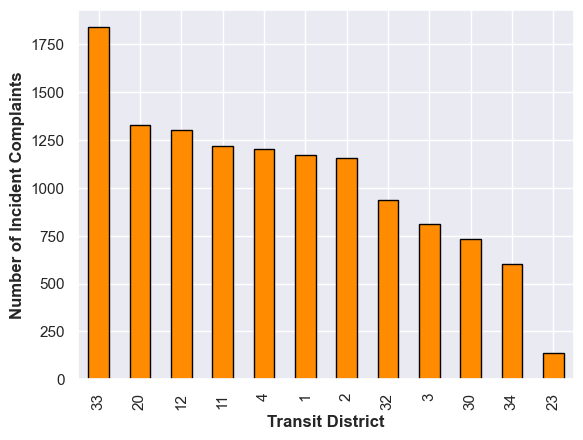

In [83]:
#NOTE: this graph does NOT contain the NaN values

#lets visualize it
df['Transit District'].value_counts().plot(kind='bar',color='darkorange',edgecolor='black')

#label the axis
plt.ylabel('Number of Incident Complaints',fontweight='bold')
plt.xlabel('Transit District',fontweight='bold')

#show
plt.show()

# NOTE

The next step is to visualize the data, specifically the values with precincts on a map of NYC. I will export the new dataframe as a parquet and import it into a new notebook. 

Saving the dataframe as a parquet file will maintain all the changes and data type conversions we conducted earlier in the beginning of the notebook.

In [77]:
#export dataframe to parquet
df.to_parquet("cleaned_nypd_dataset.parquet",index=False)